## Hack.Diversity Data Interview: Product Inclusion Analysis Challenge

#  1- Retrieve and Inspect the Dataset

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_name = 'inclusive_features_usage1.csv'  
df = pd.read_csv(file_name)

In [4]:
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes
0,user_4737,Multilingual,60.77,4,4,Teenager,NaN,LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,NaN
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,NaN
3,user_5519,Colorblind Mode,26.36,3,1,Adult,NaN,LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  object 
 1   feature_used            10000 non-null  object 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  object 
 6   gender                  6003 non-null   object 
 7   additional_attributes   3997 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 625.1+ KB


# 2- Data Cleaning & Preparation

## Coverting objects to strings for ease-of-use

In [6]:
df['user_id'] = df['user_id'].astype('string')
df['feature_used'] = df['feature_used'].astype('string')
df['age_group'] = df['age_group'].astype('string')
df['gender'] = df['gender'].astype('string')
df['additional_attributes'] = df['additional_attributes'].astype('string')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 10000 non-null  string 
 1   feature_used            10000 non-null  string 
 2   session_duration        10000 non-null  float64
 3   engagement_score        10000 non-null  int64  
 4   accessibility_settings  10000 non-null  int64  
 5   age_group               10000 non-null  string 
 6   gender                  6003 non-null   string 
 7   additional_attributes   3997 non-null   string 
dtypes: float64(1), int64(2), string(5)
memory usage: 625.1 KB


In [7]:
df.isnull().sum()

user_id                      0
feature_used                 0
session_duration             0
engagement_score             0
accessibility_settings       0
age_group                    0
gender                    3997
additional_attributes     6003
dtype: int64

In [8]:
df['gender'] = df['gender'].fillna('Prefer not to say')
df['gender'].value_counts()
df['gender'] = df['gender'].replace('Prefer not to say', 'Not Provided').astype('string')
df['gender'].value_counts()
df['gender'] = df['gender'].replace('Not Provided', 'Gender Not Provided').astype('string')
df['gender'].value_counts()

gender
Gender Not Provided    3997
Male                   2029
Female                 1990
Non-Binary             1984
Name: count, dtype: Int64

## Missing values in 'additional_attributes' column

In [9]:
df['additional_attributes'] = df['additional_attributes'].fillna('No Additional Attributes')
df['additional_attributes'].value_counts()

additional_attributes
No Additional Attributes    6003
Person of Color             2018
LGBTQ+                      1979
Name: count, dtype: Int64

In [10]:
df.isnull().sum()

user_id                   0
feature_used              0
session_duration          0
engagement_score          0
accessibility_settings    0
age_group                 0
gender                    0
additional_attributes     0
dtype: int64

In [11]:
df.describe()

,session_duration,engagement_score,accessibility_settings
count,10000.000000,10000.00000,10000.000000
mean,62.443799,3.04360,2.489600
std,33.522672,1.41778,1.707332
min,5.010000,1.00000,0.000000
25%,33.070000,2.00000,1.000000
50%,63.175000,3.00000,2.000000
75%,91.600000,4.00000,4.000000
max,120.000000,5.00000,5.000000


## Outliers

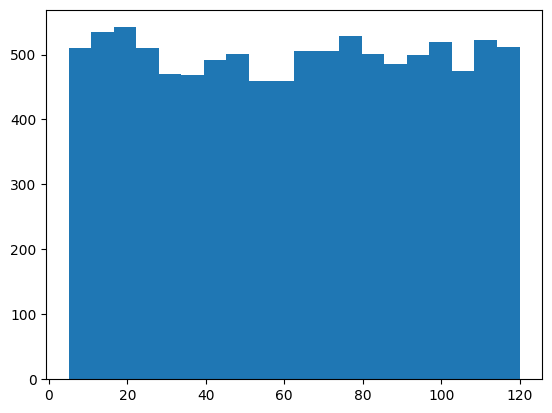

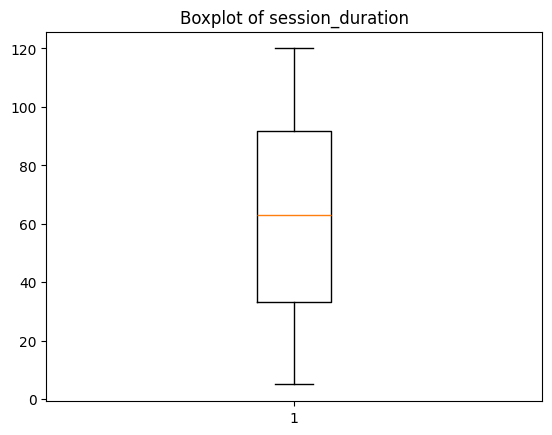

Empty DataFrame
Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
Index: []


In [12]:
# session duration

plt.hist(df['session_duration'], bins=20)
plt.show()
plt.boxplot(df['session_duration'])
plt.title('Boxplot of session_duration')
plt.show()

###########################################
Q1_session_duration = df['session_duration'].quantile(0.25)
Q3_session_duration = df['session_duration'].quantile(0.75)
IQR_session_duration = Q3_session_duration - Q1_session_duration
lower_session_duration = Q1_session_duration - (1.5 * IQR_session_duration)
upper_session_duration = Q3_session_duration + (1.5 * IQR_session_duration)
outliers_session_duration = df[(df['session_duration'] < lower_session_duration) | (df['session_duration'] > upper_session_duration)]
print(outliers_session_duration)

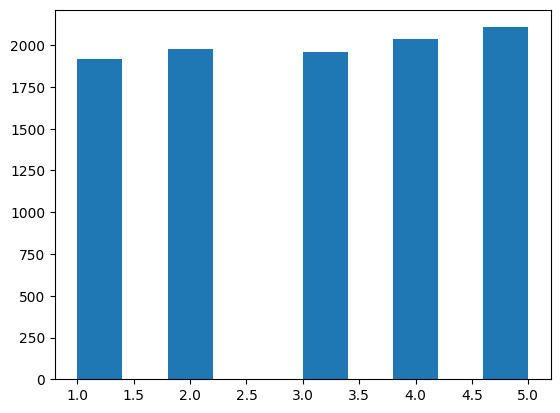

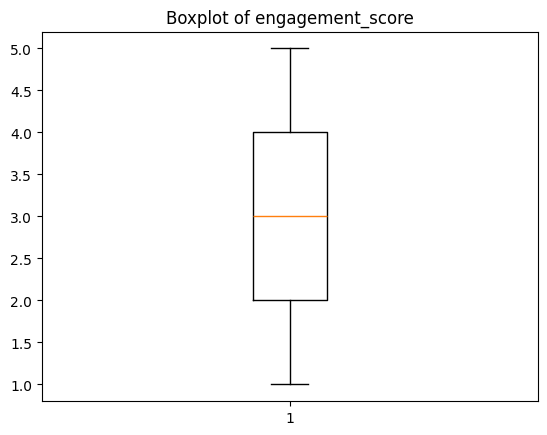

Empty DataFrame
Columns: [user_id, feature_used, session_duration, engagement_score, accessibility_settings, age_group, gender, additional_attributes]
Index: []


In [13]:
# engagement score
plt.hist(df['engagement_score'])
plt.show()
plt.boxplot(df['engagement_score'])
plt.title('Boxplot of engagement_score')
plt.show()
###########################################
Q1_engagement_score = df['engagement_score'].quantile(0.25)
Q3_engagement_score = df['engagement_score'].quantile(0.75)
IQR_engagement_score = Q3_engagement_score - Q1_engagement_score
lower_engagement_score = Q1_engagement_score - (1.5 * IQR_engagement_score)
upper_engagement_score = Q3_engagement_score + (1.5 * IQR_engagement_score)
outliers_engagement_score = df[(df['engagement_score'] < lower_engagement_score) | (df['engagement_score'] > upper_engagement_score)]
print(outliers_engagement_score)

I chose not to omit any 'outliers' in both the session duration and egagement score columns, as no values fall below the lower bound or above the upper bound as detemined by the interquartile range

## High Accessibility User Classification

high_accessibility_user
0    5035
1    4965
Name: count, dtype: int64


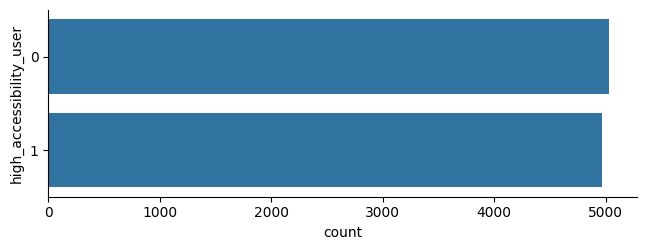

In [14]:
df['high_accessibility_user'] = [1 if x >= 3 else 0 for x in df['accessibility_settings'] ]
print(df['high_accessibility_user'].value_counts())
high_accessibility_user = sns.catplot(y="high_accessibility_user", kind="count", data=df, height=2.6, aspect=2.5)

I chose to impute 1s and 0s for the high_accessibility_user column because most ML models, such as linear/logistic regression work better with numeric values over boolean values. It is also easy to interpret that a '1' in the column means that the user is classed as high accessibility, and a '0' means that the user is not classed as high accessibility.

## Intersectionality Analysis - demographics column

In [15]:
df['demographics'] = df['age_group'] + '-' + df['gender'] + '-' + df['additional_attributes']
df['demographics'].head(10)
df.head()

,user_id,feature_used,session_duration,engagement_score,accessibility_settings,age_group,gender,additional_attributes,high_accessibility_user,demographics
0,user_4737,Multilingual,60.77,4,4,Teenager,Gender Not Provided,LGBTQ+,1,Teenager-Gender Not Provided-LGBTQ+
1,user_1492,Text-to-Speech,20.20,5,4,Professional,Non-Binary,No Additional Attributes,1,Professional-Non-Binary-No Additional Attributes
2,user_5936,Colorblind Mode,93.78,2,2,Adult,Female,No Additional Attributes,0,Adult-Female-No Additional Attributes
3,user_5519,Colorblind Mode,26.36,3,1,Adult,Gender Not Provided,LGBTQ+,0,Adult-Gender Not Provided-LGBTQ+
4,user_1853,High Contrast Mode,91.67,5,1,Young Adult,Male,No Additional Attributes,0,Young Adult-Male-No Additional Attributes


In [16]:
df['demographics'].value_counts()

demographics
Adult-Non-Binary-No Additional Attributes           431
Adult-Male-No Additional Attributes                 426
Senior-Male-No Additional Attributes                420
Professional-Male-No Additional Attributes          417
Young Adult-Female-No Additional Attributes         414
Professional-Gender Not Provided-Person of Color    411
Senior-Gender Not Provided-LGBTQ+                   411
Young Adult-Gender Not Provided-Person of Color     410
Senior-Gender Not Provided-Person of Color          408
Senior-Female-No Additional Attributes              406
Teenager-Gender Not Provided-Person of Color        405
Adult-Gender Not Provided-LGBTQ+                    402
Young Adult-Non-Binary-No Additional Attributes     401
Teenager-Gender Not Provided-LGBTQ+                 396
Professional-Female-No Additional Attributes        394
Young Adult-Gender Not Provided-LGBTQ+              392
Adult-Female-No Additional Attributes               392
Professional-Non-Binary-No Addition

The site is most commonly used by Non-Binary Adults, and least commonly used by Young Adult Males

# 3-EDA

## Engagement Score Analysis

In [17]:
df.groupby('age_group')['engagement_score'].mean().round(2)

age_group
Adult           2.95
Professional    3.10
Senior          3.03
Teenager        3.10
Young Adult     3.04
Name: engagement_score, dtype: float64

In [18]:
df.groupby('gender')['engagement_score'].mean().round(2)

gender
Female                 3.05
Gender Not Provided    3.05
Male                   3.00
Non-Binary             3.07
Name: engagement_score, dtype: float64

In [19]:
df.groupby('additional_attributes')['engagement_score'].mean().round(2)

additional_attributes
LGBTQ+                      3.06
No Additional Attributes    3.04
Person of Color             3.05
Name: engagement_score, dtype: float64

In [20]:
df.groupby('high_accessibility_user')['engagement_score'].mean().round(2)

high_accessibility_user
0    3.07
1    3.01
Name: engagement_score, dtype: float64

/var/tmp/ipykernel_8902/1591946016.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='engagement_score', data=df, ax=ax1, estimator='mean', hue = 'age_group', palette=palette, ci=None)
/var/tmp/ipykernel_8902/1591946016.py:6: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='age_group', y='engagement_score', data=df, ax=ax1, estimator='mean', hue = 'age_group', palette=palette, ci=None)
/var/tmp/ipykernel_8902/1591946016.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='gender', y='engagement_score', data=df, ax=ax2, estimator='mean', hue='gender', palette=palette, ci=None)
/var/tmp/ipykernel_8902/1591946016.py:12: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='gender', y='engagement_score', data=df, ax=ax2, estimator=

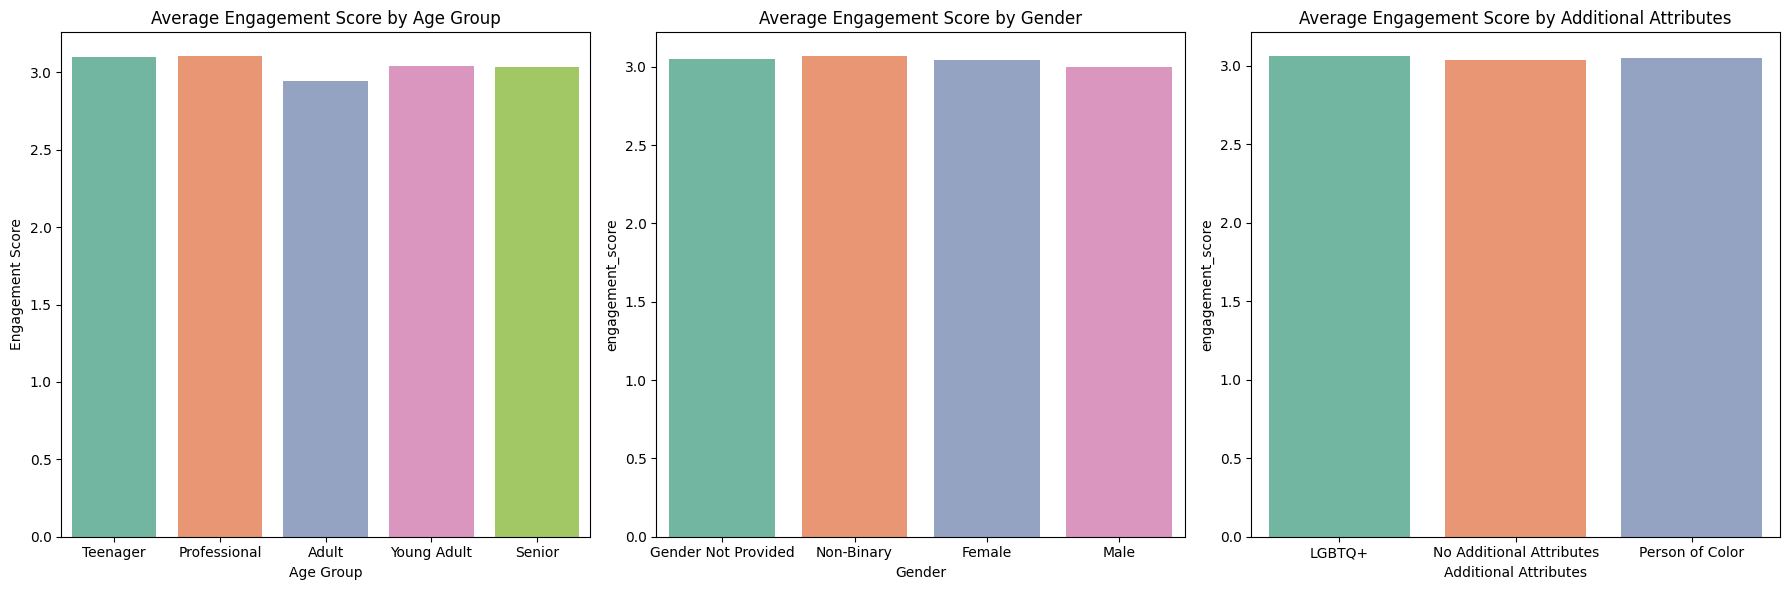

In [21]:
##### barplots ######
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(18,6))
palette = sns.color_palette("Set2")

#Age Group
sns.barplot(x='age_group', y='engagement_score', data=df, ax=ax1, estimator='mean', hue = 'age_group', palette=palette, ci=None)
ax1.set_title('Average Engagement Score by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Engagement Score')

#Gender
sns.barplot(x='gender', y='engagement_score', data=df, ax=ax2, estimator='mean', hue='gender', palette=palette, ci=None)
ax2.set_title('Average Engagement Score by Gender')
ax2.set_xlabel('Gender')
ax1.set_ylabel('Engagement Score')

#additional attributes
sns.barplot(x='additional_attributes', y='engagement_score', data=df, ax=ax3, estimator='mean', hue='additional_attributes', palette=palette, ci=None)
ax3.set_title('Average Engagement Score by Additional Attributes')
ax3.set_xlabel('Additional Attributes')
ax1.set_ylabel('Engagement Score')

plt.tight_layout()
plt.show()

While engagement is relatively the same across demographics, Professionals hold slightly higher engagement scores than other age groups. Non-Binary individuals have a slightly higher engagement score than other genders, and LGBTQ+ individuals claim a slightly higher score than other demographics provided in the additional attributes column. The company can either survey groups that show disparities from others in terms of engagement or implement A/B testing for such groups in order to drive higher engagement.

## Feature Usage by Demographic

In [22]:
df.groupby('feature_used')['age_group'].value_counts().sort_values(ascending=False)

feature_used        age_group   
Colorblind Mode     Adult           428
Text-to-Speech      Adult           423
Colorblind Mode     Teenager        423
High Contrast Mode  Senior          414
Colorblind Mode     Professional    412
Text-to-Speech      Senior          411
High Contrast Mode  Young Adult     410
Multilingual        Senior          410
                    Professional    409
Visual Aid          Young Adult     406
Colorblind Mode     Senior          403
Visual Aid          Adult           402
High Contrast Mode  Teenager        398
                    Professional    397
Multilingual        Adult           394
Colorblind Mode     Young Adult     394
Multilingual        Young Adult     392
Text-to-Speech      Young Adult     391
                    Teenager        388
High Contrast Mode  Adult           388
Visual Aid          Senior          388
                    Professional    387
Text-to-Speech      Professional    385
Visual Aid          Teenager        374
Multili

In [23]:
df.groupby('feature_used')['gender'].value_counts().sort_values(ascending=False)

feature_used        gender             
Colorblind Mode     Gender Not Provided    850
High Contrast Mode  Gender Not Provided    810
Multilingual        Gender Not Provided    792
Visual Aid          Gender Not Provided    784
Text-to-Speech      Gender Not Provided    761
                    Female                 423
Multilingual        Male                   422
Text-to-Speech      Non-Binary             420
Visual Aid          Male                   417
Colorblind Mode     Male                   409
                    Non-Binary             408
High Contrast Mode  Non-Binary             407
                    Female                 403
Text-to-Speech      Male                   394
Colorblind Mode     Female                 393
Visual Aid          Female                 390
High Contrast Mode  Male                   387
Multilingual        Non-Binary             383
                    Female                 381
Visual Aid          Non-Binary             366
Name: count, dtype: 

In [24]:
df.groupby('feature_used')['additional_attributes'].value_counts().sort_values(ascending=False)

feature_used        additional_attributes   
Text-to-Speech      No Additional Attributes    1237
Colorblind Mode     No Additional Attributes    1210
High Contrast Mode  No Additional Attributes    1197
Multilingual        No Additional Attributes    1186
Visual Aid          No Additional Attributes    1173
Colorblind Mode     Person of Color              435
                    LGBTQ+                       415
High Contrast Mode  Person of Color              411
Visual Aid          LGBTQ+                       402
Multilingual        Person of Color              401
High Contrast Mode  LGBTQ+                       399
Multilingual        LGBTQ+                       391
Text-to-Speech      Person of Color              389
Visual Aid          Person of Color              382
Text-to-Speech      LGBTQ+                       372
Name: count, dtype: int64

In [25]:
df.groupby('feature_used')['demographics'].value_counts().sort_values(ascending=False)

feature_used        demographics                                    
Colorblind Mode     Adult-Non-Binary-No Additional Attributes           105
Text-to-Speech      Young Adult-Gender Not Provided-Person of Color     100
                    Adult-Non-Binary-No Additional Attributes            97
Colorblind Mode     Adult-Gender Not Provided-LGBTQ+                     96
                    Senior-Gender Not Provided-LGBTQ+                    96
                                                                       ... 
Text-to-Speech      Adult-Gender Not Provided-Person of Color            65
Visual Aid          Professional-Non-Binary-No Additional Attributes     64
Text-to-Speech      Professional-Gender Not Provided-LGBTQ+              61
High Contrast Mode  Teenager-Male-No Additional Attributes               59
Text-to-Speech      Young Adult-Male-No Additional Attributes            57
Name: count, Length: 125, dtype: int64

Colorblind Mode is the most popular feature across all demographics, and nonbinary adults use it the most. Text-to-Speech is the least popular feature across all demographics.

/var/tmp/ipykernel_8902/2124034913.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='count', hue='age_group', data=grouped_age, palette=palette, ci=None)
/var/tmp/ipykernel_8902/2124034913.py:4: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='feature_used', y='count', hue='age_group', data=grouped_age, palette=palette, ci=None)


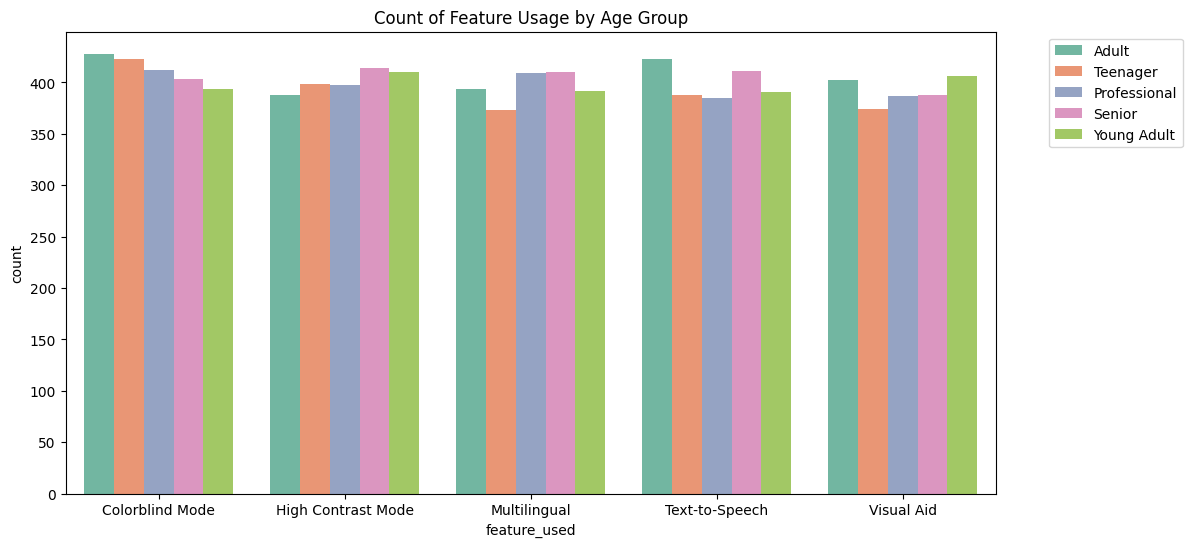

In [26]:
grouped_age = df.groupby('feature_used')['age_group'].value_counts()
grouped_age = grouped_age.reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='count', hue='age_group', data=grouped_age, palette=palette, ci=None)
plt.title('Count of Feature Usage by Age Group')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

It is important for the company to understand why a certain demographic uses each mode the least in order to identify any opportunity gaps that can be filled.

/var/tmp/ipykernel_8902/2682514161.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='engagement_score', hue='age_group', data=grouped_age_mean, palette=palette, ci=None)
/var/tmp/ipykernel_8902/2682514161.py:3: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  sns.barplot(x='feature_used', y='engagement_score', hue='age_group', data=grouped_age_mean, palette=palette, ci=None)


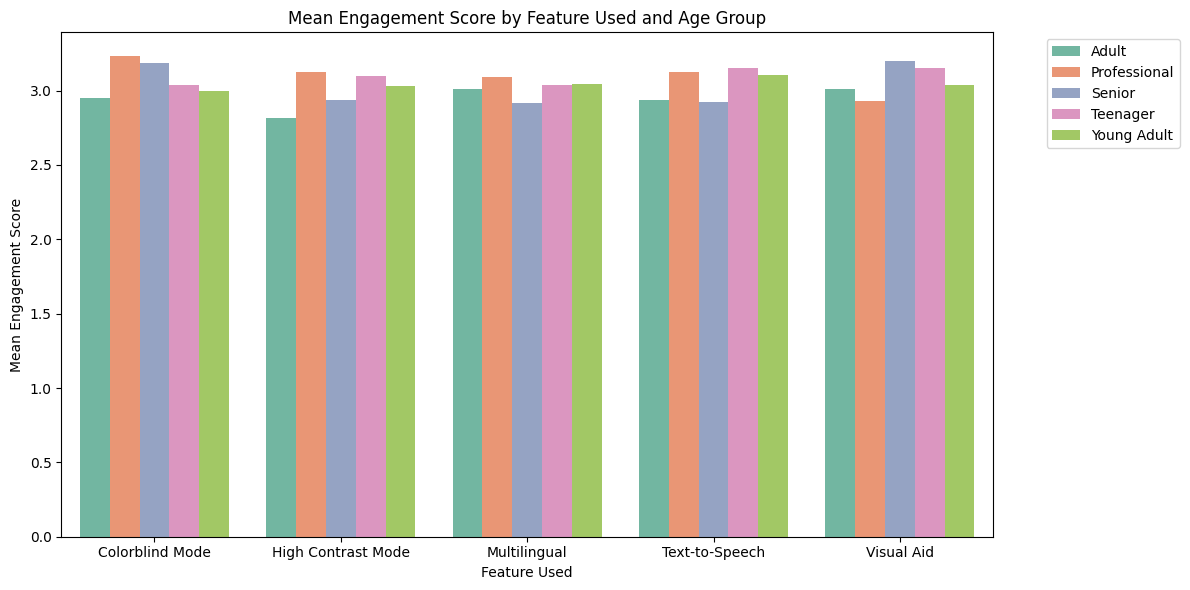

In [27]:
grouped_age_mean = df.groupby(['feature_used', 'age_group'])['engagement_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='engagement_score', hue='age_group', data=grouped_age_mean, palette=palette, ci=None)
plt.title('Mean Engagement Score by Feature Used and Age Group')
plt.xlabel('Feature Used')
plt.ylabel('Mean Engagement Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/tmp/ipykernel_8902/1948254503.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='count', hue='gender', data=grouped_gender, palette=palette, ci=None)
/var/tmp/ipykernel_8902/1948254503.py:4: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='feature_used', y='count', hue='gender', data=grouped_gender, palette=palette, ci=None)


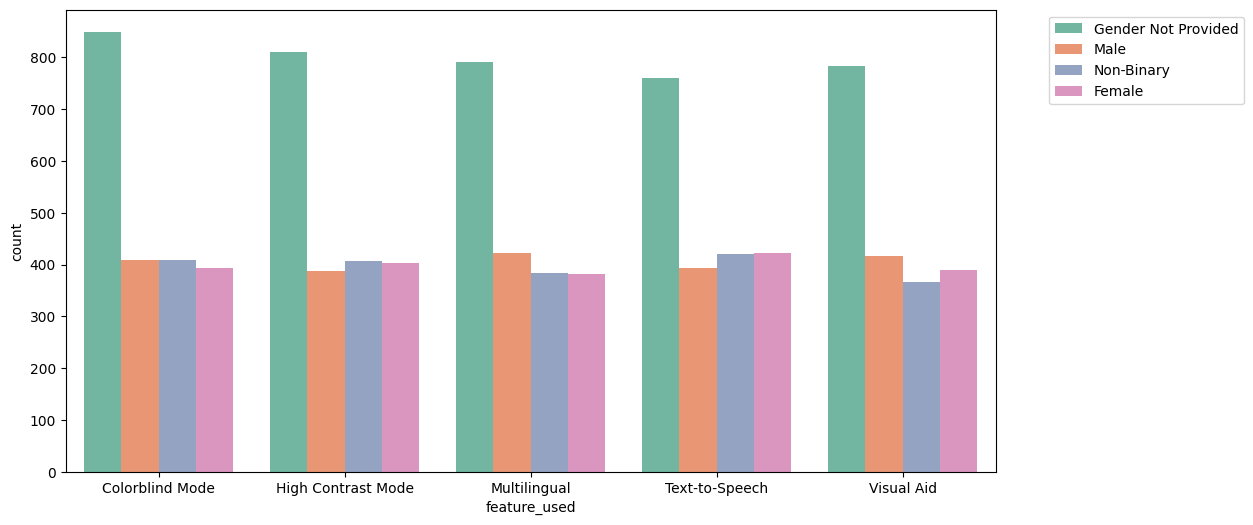

In [28]:
grouped_gender = df.groupby('feature_used')['gender'].value_counts()
grouped_gender = grouped_gender.reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='count', hue='gender', data=grouped_gender, palette=palette, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/tmp/ipykernel_8902/3845472153.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='engagement_score', hue='gender', data=grouped_gender_mean, palette=palette, ci=None)
/var/tmp/ipykernel_8902/3845472153.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  sns.barplot(x='feature_used', y='engagement_score', hue='gender', data=grouped_gender_mean, palette=palette, ci=None)


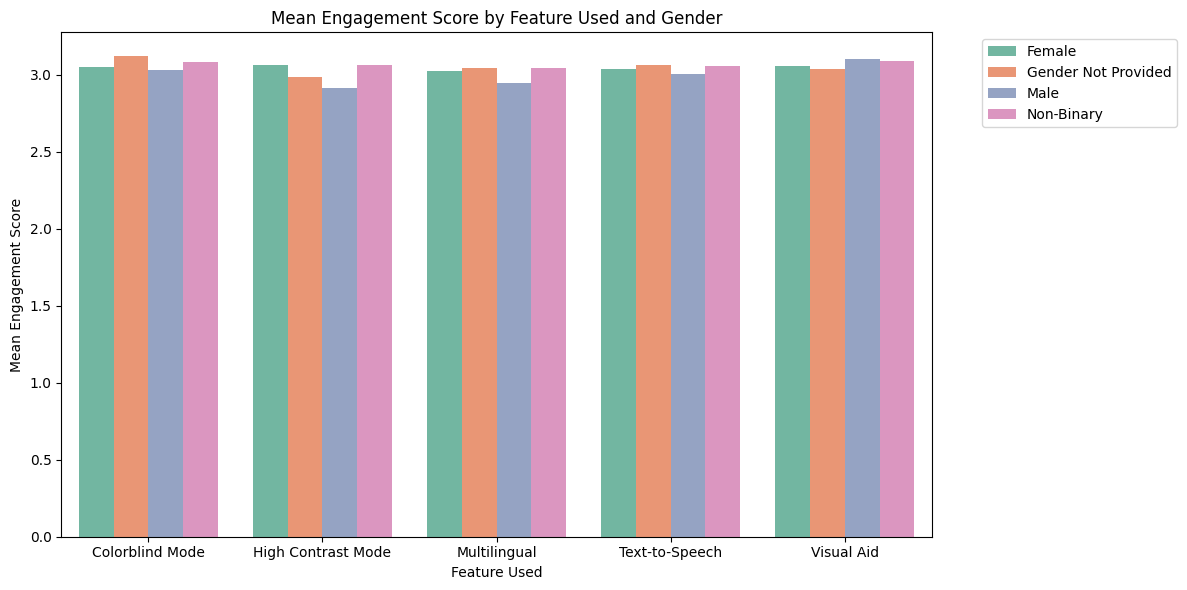

In [29]:
grouped_gender_mean = df.groupby(['feature_used', 'gender'])['engagement_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='engagement_score', hue='gender', data=grouped_gender_mean, palette=palette, ci=None)
plt.title('Mean Engagement Score by Feature Used and Gender')
plt.xlabel('Feature Used')
plt.ylabel('Mean Engagement Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/tmp/ipykernel_8902/737766941.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='count', hue='additional_attributes', data=grouped_aa, palette=palette, ci=None)
/var/tmp/ipykernel_8902/737766941.py:4: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='feature_used', y='count', hue='additional_attributes', data=grouped_aa, palette=palette, ci=None)


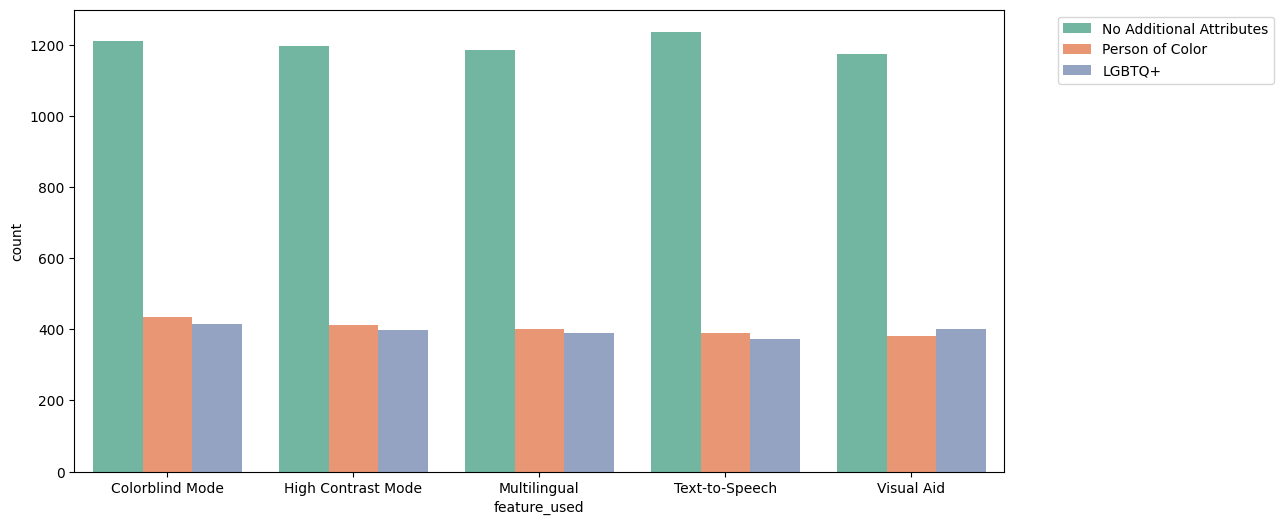

In [32]:
grouped_aa = df.groupby('feature_used')['additional_attributes'].value_counts()
grouped_aa = grouped_aa.reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='count', hue='additional_attributes', data=grouped_aa, palette=palette, ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

/var/tmp/ipykernel_8902/3639100110.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='feature_used', y='engagement_score', hue='additional_attributes', data=grouped_aa_mean, palette=palette, ci=None)
/var/tmp/ipykernel_8902/3639100110.py:3: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.barplot(x='feature_used', y='engagement_score', hue='additional_attributes', data=grouped_aa_mean, palette=palette, ci=None)


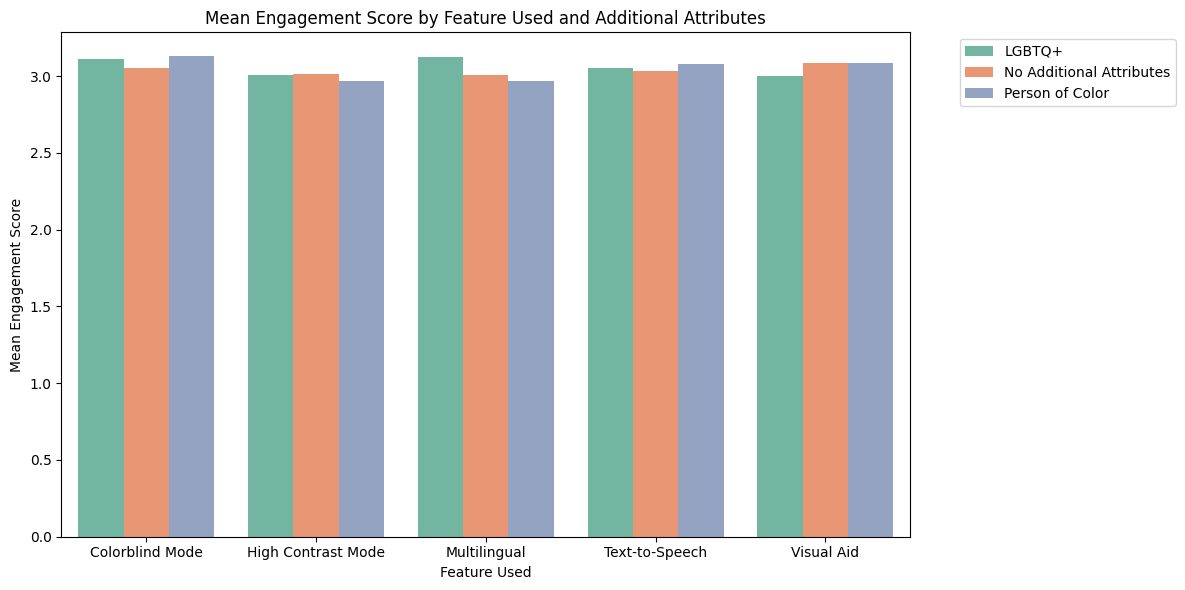

In [31]:
grouped_aa_mean = df.groupby(['feature_used', 'additional_attributes'])['engagement_score'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='feature_used', y='engagement_score', hue='additional_attributes', data=grouped_aa_mean, palette=palette, ci=None)
plt.title('Mean Engagement Score by Feature Used and Additional Attributes')
plt.xlabel('Feature Used')
plt.ylabel('Mean Engagement Score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

When we aggregate the values by the average engagement score per feature used for these demographics, more meaningful insights can be derived. We can see that professionals have the highest engagement score driven by the colorblind, high contrast, and multilingual features. For visual aid, as expected, Seniors drive engagement the most. The company may want to make colorblind mode and high contrast mode more inclusive to non-professional adults. They may also want to make multilingual and text-to-speech more inclusive to seniors, so as to drive engagement overall. Males seem to fall behind in engagement when it comes to using the high contrast, multilingual, and text-to-speech features, so a survey or A/B test directed towards males may help the company figure out why this may be the case.

# 4- Feature Engineering & Predictive Modeling

## New Features

In [33]:
df['feature_used'].value_counts()

feature_used
Colorblind Mode       2060
High Contrast Mode    2007
Text-to-Speech        1998
Multilingual          1978
Visual Aid            1957
Name: count, dtype: Int64

### Average session duration by feature used

In [34]:
avg_session_duration1 = df.groupby('feature_used')['session_duration'].mean().round(1)
df['average_session_duration_by_feature'] = df['feature_used'].map(avg_session_duration1)
df[['feature_used', 'session_duration', 'average_session_duration_by_feature']].sort_values(by='average_session_duration_by_feature', ascending=False)

,feature_used,session_duration,average_session_duration_by_feature
0,Multilingual,60.77,62.9
6117,Multilingual,10.57,62.9
1951,Multilingual,23.51,62.9
1952,Multilingual,73.22,62.9
6139,Multilingual,50.16,62.9
...,...,...,...
8308,Visual Aid,97.84,62.0
8307,Visual Aid,43.43,62.0
2958,Visual Aid,73.43,62.0
2600,Visual Aid,78.48,62.0


The multilingual feature is associated with the highest session duration for users, while the Visual Aid feature is associated with the lowest session duration.

### Average engagement score by accessibility settings

In [35]:
avg_engagement_score_as = df.groupby('accessibility_settings')['engagement_score'].mean().round(1)
df['average_engagement_score_by_accessibility_settings'] = df['accessibility_settings'].map(avg_engagement_score_as)
df[['accessibility_settings', 'average_engagement_score_by_accessibility_settings']].value_counts()

accessibility_settings  average_engagement_score_by_accessibility_settings
2                       3.1                                                   1696
0                       3.0                                                   1687
3                       3.0                                                   1662
5                       3.0                                                   1654
1                       3.1                                                   1652
4                       3.0                                                   1649
Name: count, dtype: int64

### Average engagement score by age group

In [36]:
avg_engagement_score_age = df.groupby('age_group')['engagement_score'].mean().round(1)
df['average_engagement_score_by_age_group'] = df['age_group'].map(avg_engagement_score_age)
df[['age_group', 'average_engagement_score_by_age_group']].value_counts()

age_group     average_engagement_score_by_age_group
Adult         2.9                                      2035
Senior        3.0                                      2026
Young Adult   3.0                                      1993
Professional  3.1                                      1990
Teenager      3.1                                      1956
Name: count, dtype: int64

### Average engagement score by gender

In [37]:
avg_engagement_score_gender = df.groupby('gender')['engagement_score'].mean().round(1)
df['average_engagement_score_by_gender'] = df['gender'].map(avg_engagement_score_gender)
df[['gender', 'average_engagement_score_by_gender']].value_counts()

gender               average_engagement_score_by_gender
Gender Not Provided  3.1                                   3997
Male                 3.0                                   2029
Female               3.0                                   1990
Non-Binary           3.1                                   1984
Name: count, dtype: int64

## Predictive Model - Decision Tree

In [38]:
df.columns

Index(['user_id', 'feature_used', 'session_duration', 'engagement_score',
       'accessibility_settings', 'age_group', 'gender',
       'additional_attributes', 'high_accessibility_user', 'demographics',
       'average_session_duration_by_feature',
       'average_engagement_score_by_accessibility_settings',
       'average_engagement_score_by_age_group',
       'average_engagement_score_by_gender'],
      dtype='object')

In [39]:
df['high_accessibility_user'].value_counts()

high_accessibility_user
0    5035
1    4965
Name: count, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

# target variable / features
X = df[['engagement_score', 'feature_used', 'session_duration', 'age_group']]
y = df["high_accessibility_user"]

# split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7500, 4), (2500, 4), (7500,), (2500,))

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn import set_config
#set_config(display='diagram')

cat_features = ['age_group', 'feature_used']
num_features = ['engagement_score', 'session_duration']


prep_pipeline = ColumnTransformer([
    ("cat", OneHotEncoder(drop="first"), cat_features),
], remainder='passthrough')


X_train_prepd = prep_pipeline.fit_transform(X_train)
X_test_prepd = prep_pipeline.transform(X_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
clf_full = DecisionTreeClassifier(random_state=42)
path = clf_full.cost_complexity_pruning_path(X_train_prepd, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {'ccp_alpha': ccp_alphas}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_prepd, y_train)


grid_cv_res = pd.DataFrame(grid_search.cv_results_)
grid_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
display(grid_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head())
best_tree = grid_search.best_estimator_
print(f'Total number of nodes: {best_tree.tree_.node_count}. Max depth: {best_tree.tree_.max_depth}.')

,param_ccp_alpha,mean_test_score
1130,0.000407,0.502667
1129,0.000387,0.502400
1131,0.000413,0.501333
1093,0.000284,0.500133
1096,0.000289,0.500000


Total number of nodes: 17. Max depth: 6.


In [46]:
from sklearn.metrics import accuracy_score
y_pred = best_tree.predict(X_test_prepd)
print(f'Test accuracy was {accuracy_score(y_test, y_pred):2.2%}.')

Test accuracy was 50.88%.


 First 10 predicted probabailities for the positive class: [0.48510363 0.5437788  0.5620438  0.51028233 0.48510363 0.48032407
 0.5437788  0.51028233 0.51028233 0.48510363]


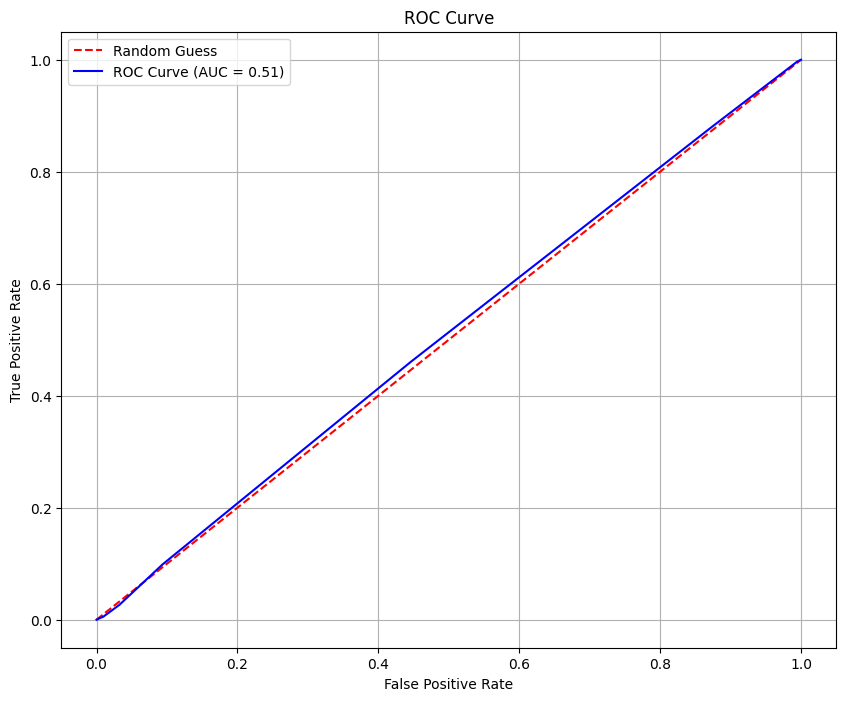

In [47]:
from sklearn.metrics import roc_auc_score, roc_curve

y_pred_proba = best_tree.predict_proba(X_test_prepd)[:, 1]

# Positive Class predicited probabilities
print(f" First 10 predicted probabailities for the positive class: {y_pred_proba[:10]}")
#ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Guess')
plt.plot(false_positive_rate, true_positive_rate, color='blue', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_pred_proba):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

As depicted by the ROC Curve, as well as the 50.88% accuracy metric achieved by the Decision Tree Clasifier, the model is not a very good predictor of whether a user is a high accessibility user or not (It is only a little bit better than randomly guessing if a user is a high accessibility user!). This could be for a variety of reasons. For example, a decision tree may be too simple of a predictive model for this use case. Features such as age group and feature used may not neccesarily have a strong correaltion with a user being a high-accessbility user. Also, a user's engagement score or session duration may not actually work well in answering the question of whether a user enabled a lot of customizations. The company may seek to include more inclusive features, but should first identify whether doing so will actually bring long-term value to not only the company itself, but also to the end-consumer.